In [15]:
# %% 
import random as rnd
import pandas as pd
import numpy as np


In [16]:
# %%
"DEFINING STATES NAMES"
def make_states (n:int):
    stateletters = "A B C D E F G H I J K L M N O P Q R S T U V W X Y Z".split(" ")
    states = ["State " + x for x in stateletters]
    return states[0:n]
states = make_states(26)
print(states)


['State A', 'State B', 'State C', 'State D', 'State E', 'State F', 'State G', 'State H', 'State I', 'State J', 'State K', 'State L', 'State M', 'State N', 'State O', 'State P', 'State Q', 'State R', 'State S', 'State T', 'State U', 'State V', 'State W', 'State X', 'State Y', 'State Z']


In [17]:
# %%
"RANDOMLY GEN STATES POPULATIONS"
rnd.seed(2)
pops = [rnd.randint(10000, 200000) for x in range(len(states))]

print(pops)

[24824, 34008, 32248, 104649, 54324, 185565, 90776, 75951, 168844, 65631, 169069, 19367, 162359, 188584, 51519, 122897, 177371, 113162, 199533, 143448, 107533, 152652, 126615, 141613, 80317, 19417]


In [18]:
"CALC TOTAL POPULATION"
total_pop = sum(pops)
print(f"Population (grand total): {total_pop:,}")


Population (grand total): 2,812,276


In [19]:
data = {"total_pop" : total_pop , "population" : pops}
df = pd.DataFrame(data,index=states)

fmt = lambda x: x.style.format({"population":"{:,d}"})
fmt(df)

,total_pop,population
State A,2812276,"24,824"
State B,2812276,"34,008"
State C,2812276,"32,248"
State D,2812276,"104,649"
State E,2812276,"54,324"
State F,2812276,"185,565"
State G,2812276,"90,776"
State H,2812276,"75,951"
State I,2812276,"168,844"
State J,2812276,"65,631"


In [20]:
df['%pop'] = df["population"] / df["total_pop"]
df.style.format({
    "population":"{:,d}",
    "%pop":"{:.1%}"
})

,total_pop,population,%pop
State A,2812276,"24,824",0.9%
State B,2812276,"34,008",1.2%
State C,2812276,"32,248",1.1%
State D,2812276,"104,649",3.7%
State E,2812276,"54,324",1.9%
State F,2812276,"185,565",6.6%
State G,2812276,"90,776",3.2%
State H,2812276,"75,951",2.7%
State I,2812276,"168,844",6.0%
State J,2812276,"65,631",2.3%


In [21]:
"NATIONWIDE POP:REP RATIO"
SET_NUM_REPS = 275
people_per_rep =  total_pop / SET_NUM_REPS
people_per_rep


10226.458181818181

$$\Large \lfloor N_{reps} \times \%_{pop} \rfloor = n_{starter}^{reps}$$

In [22]:
"""REPS WITH FLOOR DIV"""
df["reps"] = SET_NUM_REPS * (df['%pop']) // 1
df

,total_pop,population,%pop,reps
State A,2812276,24824,0.008827,2.0
State B,2812276,34008,0.012093,3.0
State C,2812276,32248,0.011467,3.0
State D,2812276,104649,0.037211,10.0
State E,2812276,54324,0.019317,5.0
State F,2812276,185565,0.065984,18.0
State G,2812276,90776,0.032278,8.0
State H,2812276,75951,0.027007,7.0
State I,2812276,168844,0.060038,16.0
State J,2812276,65631,0.023337,6.0


In [23]:
# %%
REPCOUNT = sum(df['reps'])
REPCOUNT

263.0

In [24]:
_pop = list(df['population'])
_rep = list(df['reps'])


In [25]:
"""GEOMETRIC MEAN OF DIVISOR DISCREPANCY OF DESERVED ELECTORS BY STATE"""
_y = []
for x in range(len(_pop)):
    y = _pop[x] / np.sqrt(_rep[x] * (_rep[x] +1))
    _y.append(round(y,3))

In [26]:
df['divisor'] = _y
df.divisor

State A    10134.356
State B     9817.264
State C     9309.196
State D     9977.891
State E     9918.160
State F    10034.206
State G    10698.054
State H    10149.379
State I    10237.671
State J    10127.083
State K    10251.314
State L    13694.537
State M    10480.228
State N    10197.455
State O     9406.039
State P     9839.635
State Q    10139.625
State R     9849.488
State S    10235.827
State T     9898.852
State U    10252.869
State V    10533.989
State W    10137.313
State X    10497.054
State Y    10732.811
State Z    13729.892
Name: divisor, dtype: float64

In [28]:
seats_to_fill = int(SET_NUM_REPS -  sum(df['reps']))
seats_to_fill


12

In [29]:

# %%
"""INDEX DF FROM 0 : # OF SEATS TO FILL"""
getsnewrep = df.sort_values("divisor")[0:seats_to_fill]
getsnewrep
print(list(getsnewrep.index))


['State C', 'State O', 'State B', 'State P', 'State R', 'State T', 'State E', 'State D', 'State F', 'State J', 'State A', 'State W']


In [30]:
df['addrep'] = getsnewrep['reps'] + 1

In [31]:
# %%
df['addrep'] = df['addrep'].fillna(df['reps'])
               # in the addrep col
               #            Fill nan with
               #                     #val from reps column
df.style.format(
    {"population":"{:,}",
    "total_pop":"{:,}",
    "%pop":"{:.1%}",
    "reps":"{:g}" ,
    "divisor":"{:,.6}",
    "addrep":"{:g}"}
)


,total_pop,population,%pop,reps,divisor,addrep
State A,"2,812,276","24,824",0.9%,2,"10,134.4",3
State B,"2,812,276","34,008",1.2%,3,"9,817.26",4
State C,"2,812,276","32,248",1.1%,3,"9,309.2",4
State D,"2,812,276","104,649",3.7%,10,"9,977.89",11
State E,"2,812,276","54,324",1.9%,5,"9,918.16",6
State F,"2,812,276","185,565",6.6%,18,"10,034.2",19
State G,"2,812,276","90,776",3.2%,8,"10,698.1",8
State H,"2,812,276","75,951",2.7%,7,"10,149.4",7
State I,"2,812,276","168,844",6.0%,16,"10,237.7",16
State J,"2,812,276","65,631",2.3%,6,"10,127.1",7


In [33]:
"""VERIFY REPRESENTATIVE COUNT"""
sum(df['addrep']) == SET_NUM_REPS

True

<AxesSubplot:>

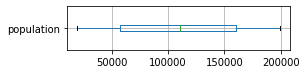

In [39]:
pd.DataFrame(df['population']).boxplot(vert=False,figsize=(4,0.8))

In [69]:
df['constits_per_rep'] = df.population // df.reps
df['perc_of_reps'] = df['addrep'] / SET_NUM_REPS
df['over_under_repr'] = df.perc_of_reps - df['%pop']
df.style.format({"population":"{:,}",
    "total_pop":"{:,}",
    "%pop":"{:.1%}",
    "reps":"{:g}" ,
    "divisor":"{:,.6}",
    "addrep":"{:g}",
    "constits_per_rep":"{:g}",
    "perc_of_reps":"{:.1%}",
    "over_under_repr":"{:.1%}"})

,total_pop,population,%pop,reps,divisor,addrep,constits_per_rep,perc_of_reps,over_under_repr
State A,"2,812,276","24,824",0.9%,2,"10,134.4",3,12412,1.1%,0.2%
State B,"2,812,276","34,008",1.2%,3,"9,817.26",4,11336,1.5%,0.2%
State C,"2,812,276","32,248",1.1%,3,"9,309.2",4,10749,1.5%,0.3%
State D,"2,812,276","104,649",3.7%,10,"9,977.89",11,10464,4.0%,0.3%
State E,"2,812,276","54,324",1.9%,5,"9,918.16",6,10864,2.2%,0.3%
State F,"2,812,276","185,565",6.6%,18,"10,034.2",19,10309,6.9%,0.3%
State G,"2,812,276","90,776",3.2%,8,"10,698.1",8,11347,2.9%,-0.3%
State H,"2,812,276","75,951",2.7%,7,"10,149.4",7,10850,2.5%,-0.2%
State I,"2,812,276","168,844",6.0%,16,"10,237.7",16,10552,5.8%,-0.2%
State J,"2,812,276","65,631",2.3%,6,"10,127.1",7,10938,2.5%,0.2%


In [70]:
df.over_under_repr.corr(df.population)

-0.20053028224030411

In [83]:
pd.concat([df[df['population'] > 160000]['over_under_repr'], df[df['population'] < 60000]['over_under_repr']],axis=1).style.format("{:.1%}")


,over_under_repr,over_under_repr
State F,0.3%,nan%
State I,-0.2%,nan%
State K,-0.2%,nan%
State M,-0.3%,nan%
State N,-0.2%,nan%
State Q,-0.1%,nan%
State S,-0.2%,nan%
State A,nan%,0.2%
State B,nan%,0.2%
State C,nan%,0.3%


In [84]:
df.over_under_repr.sum()

2.3418766925686896e-17